In [1]:
import matplotlib
import matplotlib.pyplot as plt
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
import seaborn as sns
import teeplot as tp

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to True if you want all graphs saved as PDFs
save_graphs = True

In [2]:
nbm.print_metadata()

context: ci
hostname: b42d0bbc9b3d
interpreter: 3.6.5 (default, Apr  1 2018, 05:46:30)  [GCC 7.3.0]
nbcellexec: 2
nbname: gecco-workshop-2021
nbpath: /opt/conduit/binder/date=2021+project=t8wrf/gecco-workshop-2021.ipynb
revision: null
session: 688be1d4-e5da-43da-b0a2-d0ec99213e80
timestamp: 2021-09-26T01:26:06Z00:00


IPython==7.16.1
keyname==0.4.1
yaml==5.4.1
matplotlib==3.3.2
nbmetalog==0.2.1
numpy==1.19.5
pandas==1.1.2
seaborn==0.11.0
teeplot==0.2.0
re==2.2.1
ipython_genutils==0.2.0
logging==0.5.1.2
zmq==22.2.1
json==2.0.9
six==1.15.0
ipykernel==5.5.3


## Import data

In [3]:
ds_thread = pd.read_csv("https://osf.io/t8wrf/download")
nbm.print_dataframe_summary(*eval(nbm.nvp_expr(
    'ds_thread'
)))

a: ds_thread
digest: 8b17cded7bc5569786a016fe6535a04b1bbdf0dfd9b95c1c07de3aaaea073853
num cols: 26
num cols all na: 0
num cols any na: 12
num na: 2400
num rows: 450
num rows all na: 0
num rows any na: 200
size: 261K



In [4]:
ds_proc = pd.read_csv("https://osf.io/dkj9n/download")
nbm.print_dataframe_summary(*eval(nbm.nvp_expr(
    'ds_proc'
)))

a: ds_proc
digest: 2f3020b3f4d693699171b47fc9520f05b2c39b7776b309ad6075b250caa0b6bc
num cols: 26
num cols all na: 0
num cols any na: 12
num na: 1920
num rows: 360
num rows all na: 0
num rows any na: 160
size: 250K



In [5]:
ds_control = pd.read_csv("https://osf.io/3jz4w/download")
nbm.print_dataframe_summary(*eval(nbm.nvp_expr(
    'ds_control'
)))

a: ds_control
digest: d5802ca15d6ca3c64a3bc1171b89f56f2060b6924b3b535d6586c9f096f22ab7
num cols: 26
num cols all na: 12
num cols any na: 12
num na: 300
num rows: 25
num rows all na: 0
num rows any na: 25
size: 14K



### Concatenate data

In [6]:
pd.concat([ds_control, ds_thread, ds_proc])

,updates total,updates min,updates max,updates std,sent total,sent min,sent max,sent std,recieved total,received min,...,nprocs,nthreads,replicate,seconds,asynchronicity mode,hostname,source sha,container tag,container digest,executable
0,109443,109443,109443,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0,1800,4,vim-200,960f0a0686df91bd8e86dd788ccc266ad7eb942c,sha-128c94d,sha256:9ed9bae2fb9230c4547ec0768d5877930ecc10a...,dishtiny
1,440970,109682,111142,558.666493,NaN,NaN,NaN,NaN,NaN,NaN,...,4,1,0,1800,4,vim-002,960f0a0686df91bd8e86dd788ccc266ad7eb942c,sha-128c94d,sha256:9ed9bae2fb9230c4547ec0768d5877930ecc10a...,dishtiny
2,1266452,76874,81514,1460.918226,NaN,NaN,NaN,NaN,NaN,NaN,...,16,1,0,1800,4,vim-002,960f0a0686df91bd8e86dd788ccc266ad7eb942c,sha-128c94d,sha256:9ed9bae2fb9230c4547ec0768d5877930ecc10a...,dishtiny
3,2366016,71843,75490,1140.984553,NaN,NaN,NaN,NaN,NaN,NaN,...,32,1,0,1800,4,vim-002,960f0a0686df91bd8e86dd788ccc266ad7eb942c,sha-128c94d,sha256:9ed9bae2fb9230c4547ec0768d5877930ecc10a...,dishtiny
4,4279242,62216,74477,2697.906192,NaN,NaN,NaN,NaN,NaN,NaN,...,64,1,0,1800,4,vim-002,960f0a0686df91bd8e86dd788ccc266ad7eb942c,sha-128c94d,sha256:9ed9bae2fb9230c4547ec0768d5877930ecc10a...,dishtiny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,32550,32550,32550,0.000000,263655000.0,263655000.0,263655000.0,0.0,263650950.0,263650950.0,...,1,1,5,5,4,"lac-[039-043,209,339,353-356,358-360,364,375-3...",d921d8db2a15ce62359b3bdbcb93089d78fc87b3,sha-5dcf5ca,sha256:9a11d6e77b1f28db2671225a1bc3dfc09f640aa...,channel_selection
356,33123,33123,33123,0.000000,268296300.0,268296300.0,268296300.0,0.0,268292250.0,268292250.0,...,1,1,6,5,4,"lac-[039-043,209,339,353-356,358-360,364,375-3...",d921d8db2a15ce62359b3bdbcb93089d78fc87b3,sha-5dcf5ca,sha256:9a11d6e77b1f28db2671225a1bc3dfc09f640aa...,channel_selection
357,34977,34977,34977,0.000000,283313700.0,283313700.0,283313700.0,0.0,283309650.0,283309650.0,...,1,1,7,5,4,"lac-[039-043,209,339,353-356,358-360,364,375-3...",d921d8db2a15ce62359b3bdbcb93089d78fc87b3,sha-5dcf5ca,sha256:9a11d6e77b1f28db2671225a1bc3dfc09f640aa...,channel_selection
358,31182,31182,31182,0.000000,252574200.0,252574200.0,252574200.0,0.0,252570150.0,252570150.0,...,1,1,8,5,4,"lac-[039-043,209,339,353-356,358-360,364,375-3...",d921d8db2a15ce62359b3bdbcb93089d78fc87b3,sha-5dcf5ca,sha256:9a11d6e77b1f28db2671225a1bc3dfc09f640aa...,channel_selection


# Graphing

### Determine number of updates per CPU (threads * processes)

In [7]:
ds_thread["ncpus"] = ds_thread["nthreads"] * ds_thread["nprocs"]
ds_thread["conflicts per cpu"] = ds_thread["conflicts total"] / ds_thread["ncpus"]
ds_thread["updates per cpu-second"] = ds_thread["updates total"] / ds_thread["ncpus"] / ds_thread["seconds"]

In [8]:
ds_proc["ncpus"] = ds_proc["nthreads"] * ds_proc["nprocs"]
ds_proc["conflicts per cpu"] = ds_proc["conflicts total"] / ds_proc["ncpus"]
ds_proc["updates per cpu-second"] = ds_proc["updates total"] / ds_proc["ncpus"] / ds_proc["seconds"]

In [9]:
ds_control["ncpus"] = ds_control["nthreads"] * ds_control["nprocs"]
ds_control["updates per cpu-second"] = ds_control["updates total"] / ds_control["ncpus"] / ds_control["seconds"]

## Graph coloring problem

#### This problem is described in [_WLAN channel selection without communication_](https://dl.acm.org/doi/abs/10.1016/j.comnet.2011.12.015). In basic terms it consists of assigning a separate color to nodes in a graph, so that each node has a different color.

We first select only the data corresponding to the multithread graph coloring runs.

In [10]:
filtered_threads = ds_thread[
    (ds_thread["executable"]=="channel_selection") &
    (ds_thread["nprocs"] == 1)
]


Next, we graph it as a bar plot.

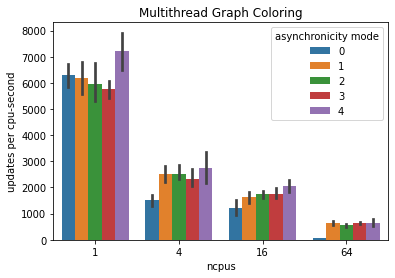

In [11]:
g = sns.barplot(x="ncpus", y="updates per cpu-second", hue="asynchronicity mode", data=filtered_threads)

g.set_title('Multithread Graph Coloring')

if save_graphs:
    plt.savefig('multithread-graph-coloring.pdf', bbox_inches='tight')

 Now, we proceed to graph the number of conflicts per CPU. They are inversely proportional to the solution quality. Note the y axis is logarithmic.

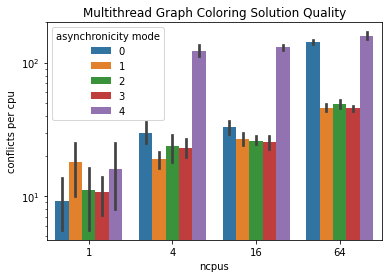

In [12]:
g = sns.barplot(x="ncpus", y="conflicts per cpu", hue="asynchronicity mode", data=filtered_threads)

g.set_title('Multithread Graph Coloring Solution Quality')
g.set_yscale('log')

if save_graphs:
    plt.savefig('multithread-graph-coloring-solution-quality.pdf', bbox_inches='tight')

We now select only the multiprocess graph coloring data...

In [13]:
filtered_procs = ds_proc[
    (ds_proc["executable"]=="channel_selection") &
    (ds_proc["nthreads"] == 1)
]

...and graph it the same way.

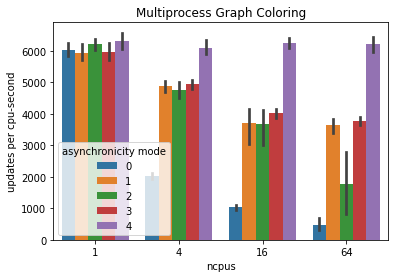

In [14]:
g = sns.barplot(x="ncpus", y="updates per cpu-second", hue="asynchronicity mode", data=filtered_procs)

g.set_title('Multiprocess Graph Coloring')

if save_graphs:
    plt.savefig('multiprocess-graph-coloring.pdf', bbox_inches='tight')

 Now, we proceed to graph the number of conflicts per CPU. They are inversely proportional to the solution quality. Note the y-axis is logarithmic.

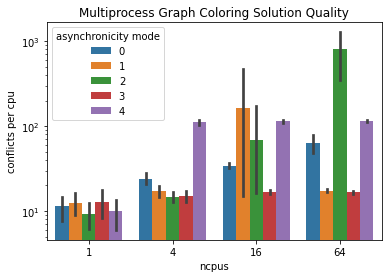

In [15]:
g = sns.barplot(x="ncpus", y="conflicts per cpu", hue="asynchronicity mode", data=filtered_procs)

g.set_title('Multiprocess Graph Coloring Solution Quality')
g.set_yscale('log')

if save_graphs:
    plt.savefig('multiprocess-graph-coloring-solution-quality.pdf', bbox_inches='tight')

## Digital evolution problem

#### This problem consists of evolving a system of digital cells. You can read more about dishtiny [here](https://dishtiny.readthedocs.io/en/latest/).

Once again, we first only select the multithreaded data corresponding to this problem.

In [16]:
ds_control["nthreads"] = ds_control["nprocs"]
ds_control["nprocs"] = 1

ds_both = pd.concat([ds_thread, ds_control])

filtered_threads_dish = ds_both[
    (ds_both["executable"] == "dishtiny") &
    (ds_both["nprocs"] == 1) &
    (ds_both["ncpus"] != 32) # we remove this because we only have control data for it
]


And we graph it.

f = sns.barplot(x="ncpus", y="updates per cpu-second", hue="asynchronicity mode", data=filtered_threads_dish)

f.set_title('Multithread Digital Evolution')

if save_graphs:
    plt.savefig('multithread-digital-evolution.pdf', bbox_inches='tight')

Finally, we select and graph the multiprocess digital evolution data.

In [17]:
filtered_procs_dish = ds_proc[
    (ds_proc["executable"]=="dishtiny") &
    (ds_proc["nthreads"] == 1)
]

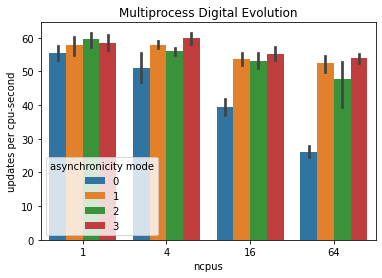

In [18]:
g = sns.barplot(x="ncpus", y="updates per cpu-second", hue="asynchronicity mode", data=filtered_procs_dish)

g.set_title('Multiprocess Digital Evolution')

if save_graphs:
    plt.savefig('multiprocess-digital-evolution.pdf', bbox_inches='tight')

# Computing relative performance

In [19]:
1.0 - ds_thread[
    (ds_thread['asynchronicity mode'] == 4)
    & (ds_thread['ncpus'] == 4)
    & (ds_thread['ncpus'] == ds_thread['nthreads'])
    & (ds_thread['executable'] == 'channel_selection')
]['updates per cpu-second'].mean() / ds_thread[
    (ds_thread['asynchronicity mode'] == 4)
    & (ds_thread['ncpus'] == 1)
    & (ds_thread['ncpus'] == ds_thread['nthreads'])
    & (ds_thread['executable'] == 'channel_selection')
]['updates per cpu-second'].mean()

0.619901179206112

In [20]:
1.0 - ds_thread[
    (ds_thread['asynchronicity mode'] == 4)
    & (ds_thread['ncpus'] == 64)
    & (ds_thread['ncpus'] == ds_thread['nthreads'])
    & (ds_thread['executable'] == 'channel_selection')
]['updates per cpu-second'].mean() / ds_thread[
    (ds_thread['asynchronicity mode'] == 4)
    & (ds_thread['ncpus'] == 4)
    & (ds_thread['ncpus'] == ds_thread['nthreads'])
    & (ds_thread['executable'] == 'channel_selection')
]['updates per cpu-second'].mean()

0.7594104227885621

In [21]:
ds_control[
    (ds_control['asynchronicity mode'] == 4)
    & (ds_control['nthreads'] == 64)
    & (ds_control['executable'] == 'dishtiny')
]['updates per cpu-second'].mean() / ds_control[
    (ds_control['asynchronicity mode'] == 4)
    & (ds_control['nthreads'] == 1)
    & (ds_control['executable'] == 'dishtiny')
]['updates per cpu-second'].mean()

0.6086586294338927

In [22]:
ds_thread[
    (ds_thread['asynchronicity mode'] == 3)
    & (ds_thread['ncpus'] == 64)
    & (ds_thread['ncpus'] == ds_thread['nthreads'])
    & (ds_thread['executable'] == 'dishtiny')
]['updates per cpu-second'].mean() / ds_thread[
    (ds_thread['asynchronicity mode'] == 3)
    & (ds_thread['ncpus'] == 1)
    & (ds_thread['ncpus'] == ds_thread['nthreads'])
    & (ds_thread['executable'] == 'dishtiny')
]['updates per cpu-second'].mean()

0.42706527392510407

In [23]:
ds_thread[
    (ds_thread['asynchronicity mode'] == 3)
    & (ds_thread['ncpus'] == 64)
    & (ds_thread['ncpus'] == ds_thread['nthreads'])
    & (ds_thread['executable'] == 'dishtiny')
]['updates per cpu-second'].mean() / ds_thread[
    (ds_thread['asynchronicity mode'] == 0)
    & (ds_thread['ncpus'] == 64)
    & (ds_thread['ncpus'] == ds_thread['nthreads'])
    & (ds_thread['executable'] == 'dishtiny')
]['updates per cpu-second'].mean()

2.1382921006944446

In [24]:
ds_proc[
    (ds_proc['asynchronicity mode'] == 3)
    & (ds_proc['ncpus'] == 64)
    & (ds_proc['executable'] == 'channel_selection')
]['updates per cpu-second'].mean() / ds_proc[
    (ds_proc['asynchronicity mode'] == 3)
    & (ds_proc['ncpus'] == 1)
    & (ds_proc['executable'] == 'channel_selection')
]['updates per cpu-second'].mean()

0.6354435411985522

In [25]:
ds_proc[
    (ds_proc['asynchronicity mode'] == 3)
    & (ds_proc['ncpus'] == 64)
    & (ds_proc['executable'] == 'channel_selection')
]['updates per cpu-second'].mean() / ds_proc[
    (ds_proc['asynchronicity mode'] == 0)
    & (ds_proc['ncpus'] == 64)
    & (ds_proc['executable'] == 'channel_selection')
]['updates per cpu-second'].mean()

7.790603762180886

In [26]:
ds_proc[
    (ds_proc['asynchronicity mode'] == 3)
    & (ds_proc['ncpus'] == 64)
    & (ds_proc['executable'] == 'dishtiny')
]['updates per cpu-second'].mean() / ds_proc[
    (ds_proc['asynchronicity mode'] == 3)
    & (ds_proc['ncpus'] == 1)
    & (ds_proc['executable'] == 'dishtiny')
]['updates per cpu-second'].mean()

0.9204986770228747

In [27]:
ds_proc[
    (ds_proc['asynchronicity mode'] == 3)
    & (ds_proc['ncpus'] == 64)
    & (ds_proc['executable'] == 'dishtiny')
]['updates per cpu-second'].mean() / ds_proc[
    (ds_proc['asynchronicity mode'] == 0)
    & (ds_proc['ncpus'] == 64)
    & (ds_proc['executable'] == 'dishtiny')
]['updates per cpu-second'].mean()

2.0723602036894695